In [9]:
%matplotlib inline
import matplotlib.pyplot as plt  # type: ignore
import numpy as np
import numpy.typing as npt

from data.sin import sin_curve, sin_data
from grid.hyperparameters import (ParameterSpace, expand_grid,
                                  full_data_slices, mean_squared_error_metric,
                                  plot_metrics, plot_predictions)
from linear_regression import (GaussianBasisLeastSquaresRegression,
                               PolynomialBasisLeastSquaresRegression)

In [10]:
s_curve = sin_curve()
s_data = sin_data(n_train=200, n_test=100)

In [11]:
parameter_spaces = [
    ParameterSpace(
        model=PolynomialBasisLeastSquaresRegression,
        keyword="regularization_coefficient",
        base_parameters={"m_degrees": 10},
        space=np.linspace(0.0, 100.0, 10),
        base_data=s_data,
        data_slices=full_data_slices(len(s_data.x_train)),
    ),
    ParameterSpace(
        model=PolynomialBasisLeastSquaresRegression,
        keyword="m_degrees",
        base_parameters={},
        space=[i for i in range(10)],
        base_data=s_data,
        data_slices=full_data_slices(len(s_data.x_train)),
    ),
]

grid = expand_grid(parameter_spaces)

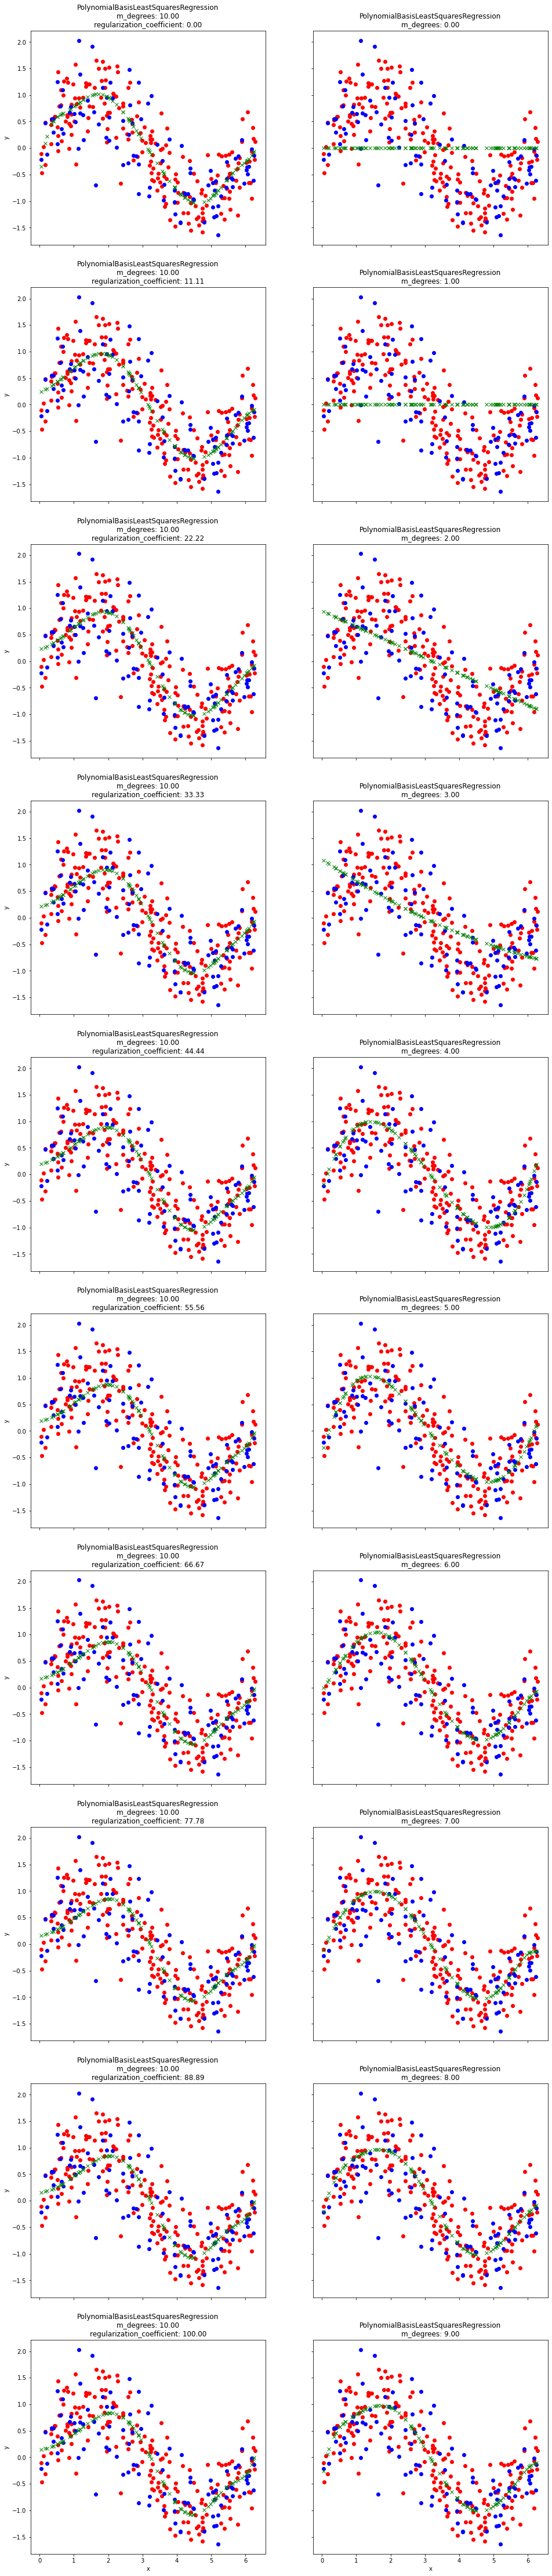

In [12]:
plot_predictions(plt, grid)

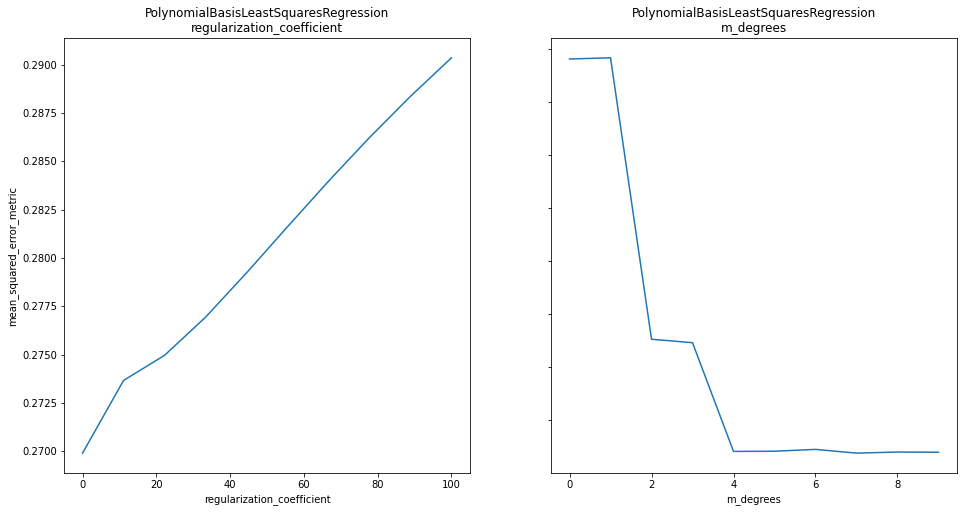

In [13]:
plot_metrics(plt, grid, mean_squared_error_metric)

In [14]:
parameter_spaces = [
    ParameterSpace(
        model=GaussianBasisLeastSquaresRegression,
        keyword="regularization_coefficient",
        base_parameters={"low": 0.0, "high": 2 * np.pi, "num": 10, "stddev": 1.0},
        space=np.linspace(0.0, 4.0, 10),
        base_data=s_data,
        data_slices=full_data_slices(len(s_data.x_train)),
    ),
    ParameterSpace(
        model=GaussianBasisLeastSquaresRegression,
        keyword="stddev",
        base_parameters={"low": 0.0, "high": 2 * np.pi, "num": 10},
        space=np.linspace(0.1, 2.0, 10),
        base_data=s_data,
        data_slices=full_data_slices(len(s_data.x_train)),
    ),
    ParameterSpace(
        model=GaussianBasisLeastSquaresRegression,
        keyword="num",
        base_parameters={"low": 0.0, "high": 2 * np.pi, "stddev": 1.0},
        space=[i for i in range(1, 11)],
        base_data=s_data,
        data_slices=full_data_slices(len(s_data.x_train)),
    ),
]

grid = expand_grid(parameter_spaces)

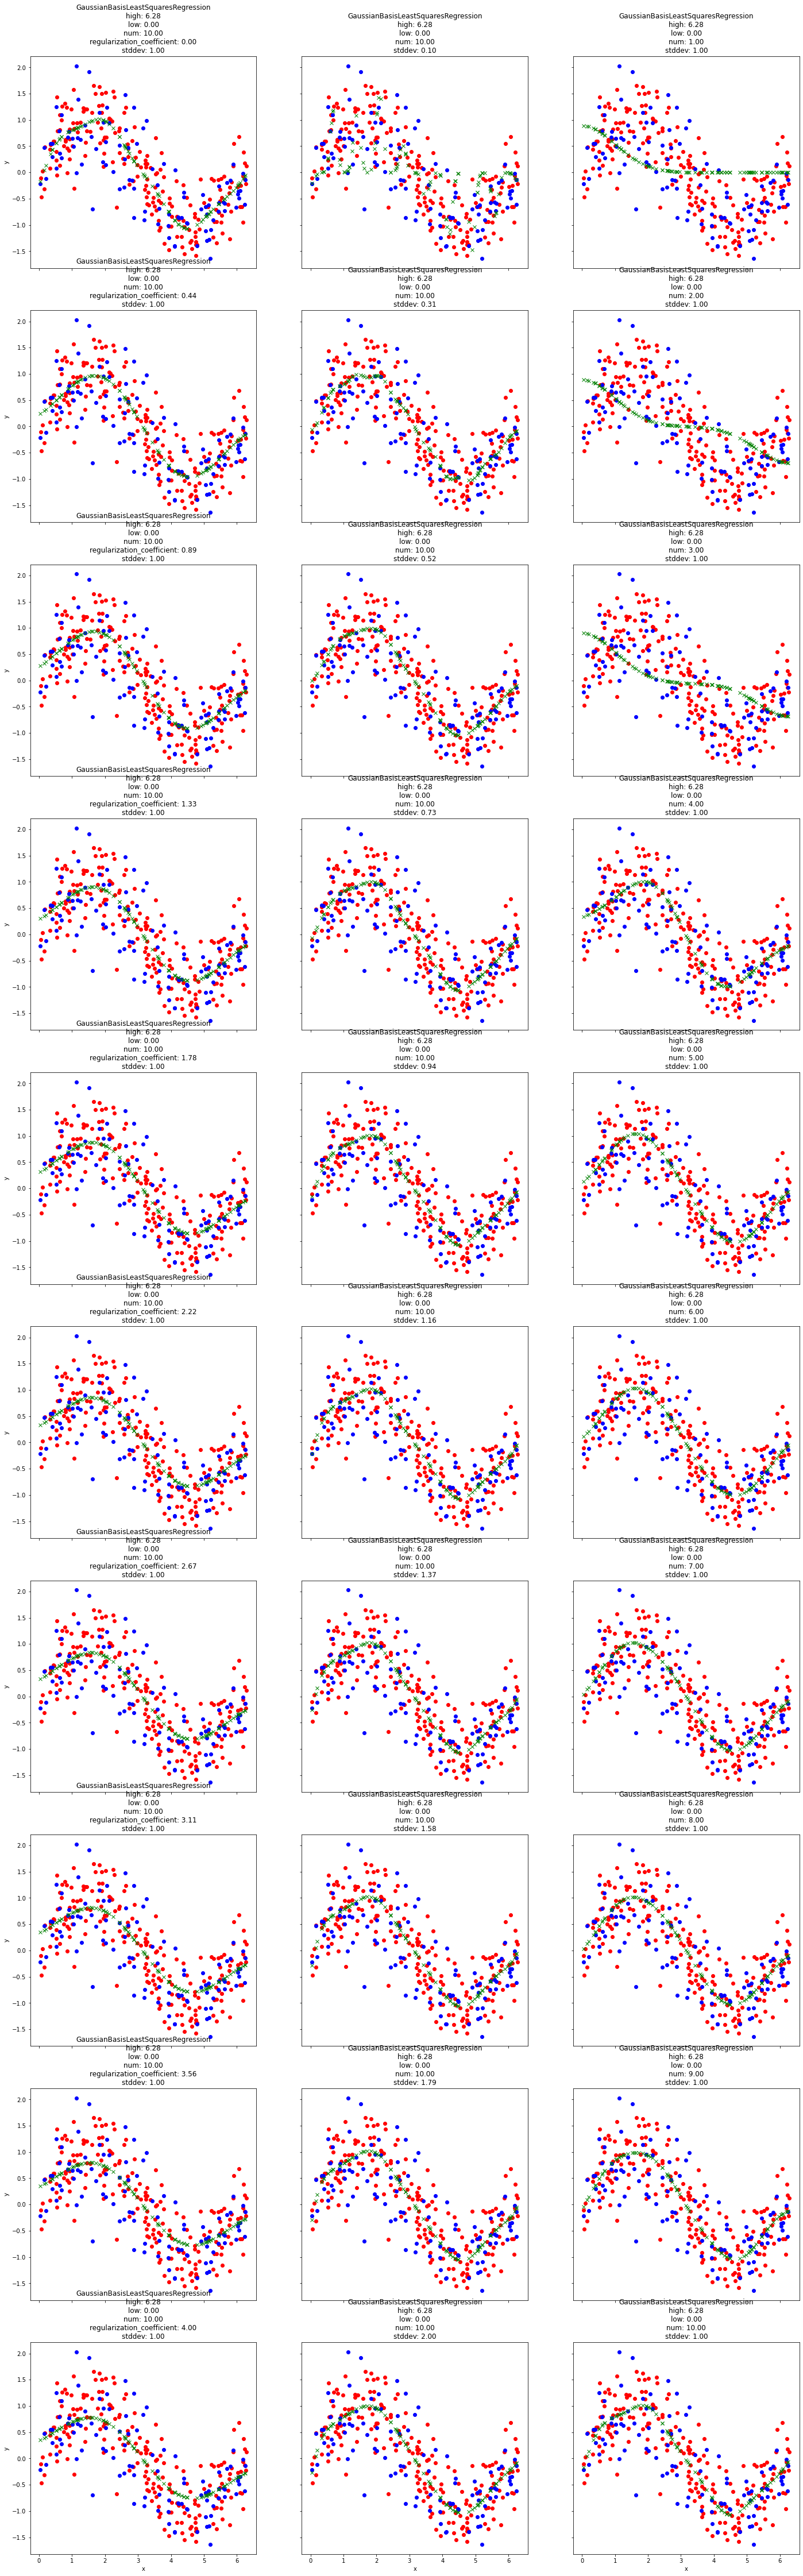

In [15]:
plot_predictions(plt, grid)

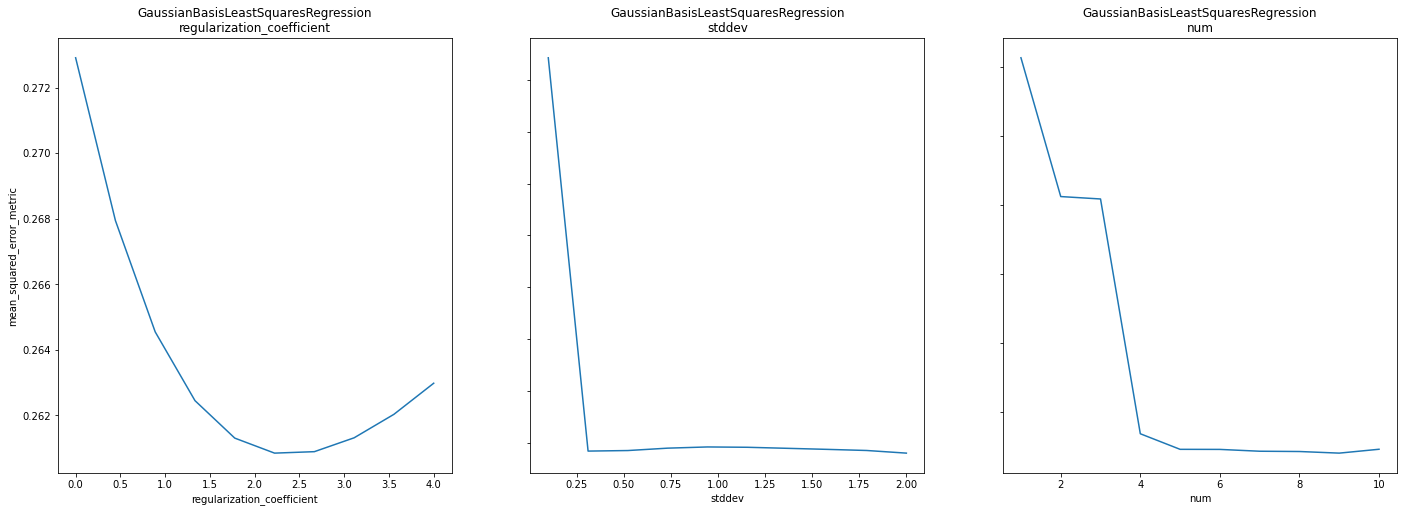

In [16]:
plot_metrics(plt, grid, mean_squared_error_metric)